# Example 5.3 - Driven second-order system

##### Initialisation

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#### Define the model

Set the parameter values for the system.

In [2]:
m=0.2
g=9.82
l=1.0
tc=1.0

Define the function that describes the model.

In [3]:
def model(z,t,u):
    x1 = z[0]
    x2 = z[1]
    dx1dt = x2
    dx2dt = 1/(m*l**2) * u - (g/l) * np.sin(x1)
    dzdt = [dx1dt,dx2dt]
    return dzdt

Set the working range of the model: inital condition and number of points.

In [4]:
z0 = [0,0]
n = 401

Set the arrays for the input signal, and the time array.

In [5]:
t = np.linspace(0,16,n)
u = np.zeros(n)
u[51:] = 1.0

Create variables for the output and set the initial condition.

In [6]:
# store solution
x = np.empty_like(t)
y = np.empty_like(t)
# record initial conditions
x[0] = z0[0]
y[0] = z0[1]

Solve the differential equation with the given restrictions.

In [7]:
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(u[i],))
    # store solution for plotting
    x[i] = z[1][0]
    y[i] = z[1][1]
    # next initial condition
    z0 = z[1]

Plot the results.

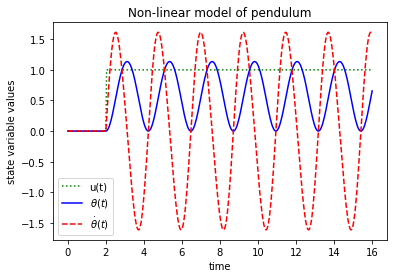

In [8]:
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,x,'b-',label=r'$\theta(t)$')
plt.plot(t,y,'r--',label=r'$\dot{\theta}(t)$')
plt.ylabel('state variable values')
plt.xlabel('time')
plt.legend(loc='best')
plt.title(r'Non-linear model of pendulum')
plt.show()